In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy



In [8]:

import numpy as np
from PIL import Image
from MLP_autograd import *
from CNN_autograd import *
train_path = "dataset/train.csv"
val_path = "dataset/val.csv"
test_path = "dataset/test.csv"
shape = 32

resize_to = (shape, shape)
x_train = []
x_validation = []
x_test = []
y_train = []
y_validation = []
y_test = []

with open(train_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)  # Resize hình ảnh
        data = np.asarray(image)
        x_train.append(data)
        y_train.append(slip_data[1])
x_train = np.array(x_train)
y_train = np.array(y_train)

with open(val_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)  # Resize hình ảnh
        data = np.asarray(image)
        x_validation.append(data)
        y_validation.append(slip_data[1])
x_validation = np.array(x_validation)
y_validation = np.array(y_validation)



with open(test_path, "r") as f:
    for line in f:
        slip_data = line.strip().split(',')
        image_path = "dataset/" + slip_data[0]
        image = Image.open(image_path)
        image = image.resize(resize_to)  # Resize hình ảnh
        data = np.asarray(image)
        if data.shape == (shape, shape, 3):
            x_test.append(data)
            y_test.append(slip_data[1])
        else:
            print(f"Image {image_path} has an unexpected shape: {data.shape}")
x_test = np.array(x_test)
y_test = np.array(y_test)





x_train = x_train/255.0
x_validation = x_validation /255.0
x_test = x_test /255.0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, np.max(Y) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

y_train = y_train.astype(int)
y_train = one_hot(y_train)

y_validation = y_validation.astype(int)
y_validation = one_hot(y_validation)

y_test = y_test.astype(int)
y_test = one_hot(y_test)

# x_train = x_train[0:1000,:,:,:]
# y_train = y_train[0:1000,:]
print(x_train.shape, y_train.shape)

print(x_validation.shape,y_validation.shape)

print(x_test.shape,y_test.shape)


Image dataset/test/corn/corn997.jpg has an unexpected shape: (32, 32)
(7000, 32, 32, 3) (7000, 10)
(1000, 32, 32, 3) (1000, 10)
(1999, 32, 32, 3) (1999, 10)


In [13]:
# Xây dựng mô hình
model_tensor = Sequential([
    Flatten(input_shape=(32*32*3,)),  # Lớp Flatten để chuyển đổi input thành vector 1 chiều
    Dense(640, activation='relu'),    # Lớp ẩn với 768 neurons và hàm kích hoạt ReLU
    Dense(10, activation='softmax')   # Lớp đầu ra với 10 neurons và hàm kích hoạt Softmax
])

# Compile mô hình với optimizer SGD
model_tensor.compile(optimizer=SGD(learning_rate=0.01),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Huấn luyện mô hình
model_tensor.fit(x_train, y_train,
          validation_data=(x_validation, y_validation),
          epochs=1001,
          batch_size=128)

Epoch 1/1001
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1608 - loss: 2.2715 - val_accuracy: 0.1910 - val_loss: 2.1556
Epoch 2/1001
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2741 - loss: 2.0266 - val_accuracy: 0.2830 - val_loss: 1.9798
Epoch 3/1001
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3465 - loss: 1.9056 - val_accuracy: 0.3130 - val_loss: 1.9147
Epoch 4/1001
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3599 - loss: 1.8388 - val_accuracy: 0.3970 - val_loss: 1.8077
Epoch 5/1001
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4017 - loss: 1.7416 - val_accuracy: 0.3810 - val_loss: 1.7848
Epoch 6/1001
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4198 - loss: 1.6947 - val_accuracy: 0.4220 - val_loss: 1.7634
Epoch 7/1001
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4268 - loss: 1.6768 - val_accuracy: 0.4100 - val_loss: 1.7653
Epoch 8/1001
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4662 - loss: 1.6124 - val_accuracy: 0.

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras.losses import CategoricalCrossentropy
from keras.callbacks import LambdaCallback

# Xây dựng mô hình
model = Sequential([
    Flatten(input_shape=(32*32*3,)),  # Lớp Flatten để chuyển đổi input thành vector 1 chiều
    Dense(640, activation='relu'),    # Lớp ẩn với 640 neurons và hàm kích hoạt ReLU
    Dense(10, activation='softmax')   # Lớp đầu ra với 10 neurons và hàm kích hoạt Softmax
])

# Compile mô hình với optimizer SGD
model.compile(optimizer=SGD(learning_rate=0.01),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Hàm callback để in ra các epoch chia hết cho 10
def print_on_epoch_end(epoch, logs=None):
    if (epoch) % 20 == 0:
        print(f'Epoch {epoch + 1}: loss = {logs["loss"]:.4f}, accuracy = {logs["accuracy"]:.4f}, '
              f'val_loss = {logs["val_loss"]:.4f}, val_accuracy = {logs["val_accuracy"]:.4f}')

# Tạo LambdaCallback
print_callback = LambdaCallback(on_epoch_end=print_on_epoch_end)

# Huấn luyện mô hình với callback và tắt logging mặc định
model.fit(x_train, y_train,
          validation_data=(x_validation, y_validation),
          epochs=801,
          batch_size=128,
          callbacks=[print_callback],
          verbose=0)  # Tắt logging mặc định


Epoch 1: loss = 2.1816, accuracy = 0.1996, val_loss = 2.1459, val_accuracy = 0.2020
Epoch 21: loss = 1.3941, accuracy = 0.5531, val_loss = 1.5246, val_accuracy = 0.4940
Epoch 41: loss = 1.1785, accuracy = 0.6324, val_loss = 1.3834, val_accuracy = 0.5390
Epoch 61: loss = 1.0419, accuracy = 0.6766, val_loss = 1.3219, val_accuracy = 0.5650
Epoch 81: loss = 0.8942, accuracy = 0.7360, val_loss = 1.2714, val_accuracy = 0.5640
Epoch 101: loss = 0.7788, accuracy = 0.7761, val_loss = 1.1910, val_accuracy = 0.6100
Epoch 121: loss = 0.6929, accuracy = 0.8051, val_loss = 1.1996, val_accuracy = 0.5890
Epoch 141: loss = 0.5881, accuracy = 0.8441, val_loss = 1.5833, val_accuracy = 0.5030
Epoch 161: loss = 0.4961, accuracy = 0.8747, val_loss = 1.1289, val_accuracy = 0.6570
Epoch 181: loss = 0.4311, accuracy = 0.8973, val_loss = 1.2162, val_accuracy = 0.6440
Epoch 201: loss = 0.3458, accuracy = 0.9260, val_loss = 1.1620, val_accuracy = 0.6590
Epoch 221: loss = 0.3219, accuracy = 0.9294, val_loss = 1.17

In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras.losses import CategoricalCrossentropy
from keras.callbacks import LambdaCallback

# Xây dựng mô hình
model = Sequential([
    Flatten(input_shape=(32*32*3,)),  # Lớp Flatten để chuyển đổi input thành vector 1 chiều
    Dense(768, activation='relu'),    # Lớp ẩn với 640 neurons và hàm kích hoạt ReLU
    Dense(10, activation='softmax')   # Lớp đầu ra với 10 neurons và hàm kích hoạt Softmax
])

# Compile mô hình với optimizer SGD
model.compile(optimizer=SGD(learning_rate=0.005),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Hàm callback để in ra các epoch chia hết cho 10
def print_on_epoch_end(epoch, logs=None):
    if (epoch) % 20 == 0:
        print(f'Epoch {epoch + 1}: loss = {logs["loss"]:.4f}, accuracy = {logs["accuracy"]:.4f}, '
              f'val_loss = {logs["val_loss"]:.4f}, val_accuracy = {logs["val_accuracy"]:.4f}')

# Tạo LambdaCallback
print_callback = LambdaCallback(on_epoch_end=print_on_epoch_end)

# Huấn luyện mô hình với callback và tắt logging mặc định
model.fit(x_train, y_train,
          validation_data=(x_validation, y_validation),
          epochs=801,
          batch_size=128,
          callbacks=[print_callback],
          verbose=0)  # Tắt logging mặc định


Epoch 1: loss = 2.2262, accuracy = 0.1786, val_loss = 2.1450, val_accuracy = 0.2390
Epoch 21: loss = 1.4944, accuracy = 0.5150, val_loss = 1.6010, val_accuracy = 0.4790
Epoch 41: loss = 1.3251, accuracy = 0.5774, val_loss = 1.5024, val_accuracy = 0.5190
Epoch 61: loss = 1.2117, accuracy = 0.6260, val_loss = 1.4395, val_accuracy = 0.5300
Epoch 81: loss = 1.1159, accuracy = 0.6651, val_loss = 1.3693, val_accuracy = 0.5670
Epoch 101: loss = 1.0310, accuracy = 0.6944, val_loss = 1.3644, val_accuracy = 0.5500
Epoch 121: loss = 0.9484, accuracy = 0.7297, val_loss = 1.3046, val_accuracy = 0.5760
Epoch 141: loss = 0.8791, accuracy = 0.7549, val_loss = 1.2975, val_accuracy = 0.5570
Epoch 161: loss = 0.8119, accuracy = 0.7799, val_loss = 1.2564, val_accuracy = 0.5840
Epoch 181: loss = 0.7412, accuracy = 0.8056, val_loss = 1.2764, val_accuracy = 0.5950
Epoch 201: loss = 0.6885, accuracy = 0.8267, val_loss = 1.1931, val_accuracy = 0.6250
Epoch 221: loss = 0.6307, accuracy = 0.8399, val_loss = 1.23

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
from keras.losses import CategoricalCrossentropy
from keras.callbacks import LambdaCallback

# Xây dựng mô hình
model = Sequential([
    Flatten(input_shape=(32*32*3,)),  # Lớp Flatten để chuyển đổi input thành vector 1 chiều
    Dense(768, activation='relu'),    # Lớp ẩn với 640 neurons và hàm kích hoạt ReLU
    Dense(10, activation='softmax')   # Lớp đầu ra với 10 neurons và hàm kích hoạt Softmax
])

# Compile mô hình với optimizer SGD
model.compile(optimizer=SGD(learning_rate=0.001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Hàm callback để in ra các epoch chia hết cho 10
def print_on_epoch_end(epoch, logs=None):
    if (epoch) % 20 == 0:
        print(f'Epoch {epoch + 1}: loss = {logs["loss"]:.4f}, accuracy = {logs["accuracy"]:.4f}, '
              f'val_loss = {logs["val_loss"]:.4f}, val_accuracy = {logs["val_accuracy"]:.4f}')

# Tạo LambdaCallback
print_callback = LambdaCallback(on_epoch_end=print_on_epoch_end)

# Huấn luyện mô hình với callback và tắt logging mặc định
model.fit(x_train, y_train,
          validation_data=(x_validation, y_validation),
          epochs=801,
          batch_size=128,
          callbacks=[print_callback],
          verbose=0)  # Tắt logging mặc định

Epoch 1: loss = 2.3160, accuracy = 0.1167, val_loss = 2.2770, val_accuracy = 0.1490
Epoch 21: loss = 1.8381, accuracy = 0.3947, val_loss = 1.8733, val_accuracy = 0.3640
Epoch 41: loss = 1.6889, accuracy = 0.4499, val_loss = 1.7436, val_accuracy = 0.4420
Epoch 61: loss = 1.5962, accuracy = 0.4840, val_loss = 1.6738, val_accuracy = 0.4580
Epoch 81: loss = 1.5312, accuracy = 0.5087, val_loss = 1.6225, val_accuracy = 0.4750
Epoch 101: loss = 1.4812, accuracy = 0.5250, val_loss = 1.5854, val_accuracy = 0.4850
Epoch 121: loss = 1.4382, accuracy = 0.5437, val_loss = 1.5575, val_accuracy = 0.5040
Epoch 141: loss = 1.4023, accuracy = 0.5564, val_loss = 1.5312, val_accuracy = 0.5080
Epoch 161: loss = 1.3710, accuracy = 0.5721, val_loss = 1.5131, val_accuracy = 0.5160
Epoch 181: loss = 1.3405, accuracy = 0.5843, val_loss = 1.4937, val_accuracy = 0.5200
Epoch 201: loss = 1.3135, accuracy = 0.5939, val_loss = 1.4807, val_accuracy = 0.5220
Epoch 221: loss = 1.2871, accuracy = 0.6076, val_loss = 1.46

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Xây dựng mô hình CNN với 2 lớp Conv2D
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile mô hình với optimizer SGD
model_cnn.compile(optimizer=SGD(learning_rate=0.01),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])


In [14]:
history = model_cnn.fit(x_train, y_train,
                        validation_data=(x_validation, y_validation),
                        epochs=500,
                        batch_size=128)


Epoch 1/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1062 - loss: 2.3078 - val_accuracy: 0.1600 - val_loss: 2.2774
Epoch 2/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1423 - loss: 2.2765 - val_accuracy: 0.2290 - val_loss: 2.2451
Epoch 3/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1752 - loss: 2.2457 - val_accuracy: 0.2570 - val_loss: 2.1963
Epoch 4/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2024 - loss: 2.1914 - val_accuracy: 0.2330 - val_loss: 2.1273
Epoch 5/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2197 - loss: 2.1281 - val_accuracy: 0.2540 - val_loss: 2.0551
Epoch 6/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2391 - loss: 2.0570 - val_accuracy: 0.2710 - val_loss: 2.0023
Epoch 7/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2770 - loss: 2.0074 - val_accuracy: 0.2860 - val_loss: 1.9671
Epoch 8/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2977 - loss: 1.9530 - val_accuracy: 0.

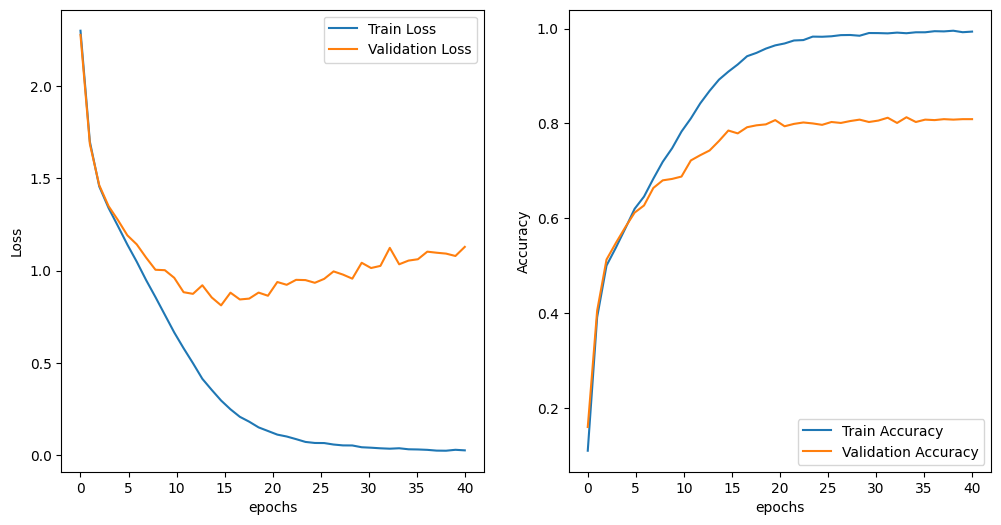

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `history` is your single history object

# Select every 12th point (because 500 / 40 ≈ 12.5)
epochs = np.arange(0, 500, 12)

# Accuracy
train_accuracy = np.array(history.history['accuracy'])[epochs]
val_accuracy = np.array(history.history['val_accuracy'])[epochs]

# Loss
train_loss = np.array(history.history['loss'])[epochs]
val_loss = np.array(history.history['val_loss'])[epochs]

# Custom x-axis for 500 epochs divided into 40 parts
x_ticks = np.arange(0, 41, 5)

plt.figure(figsize=(12, 6))

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, 40, len(epochs)), train_accuracy, label='Train Accuracy')
plt.plot(np.linspace(0, 40, len(epochs)), val_accuracy, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.xticks(x_ticks)  # Set x-ticks from 0 to 40 with a step of 5
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, 40, len(epochs)), train_loss, label='Train Loss')
plt.plot(np.linspace(0, 40, len(epochs)), val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.xticks(x_ticks)  # Set x-ticks from 0 to 40 with a step of 5
plt.legend()

plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<Figure size 1000x800 with 0 Axes>

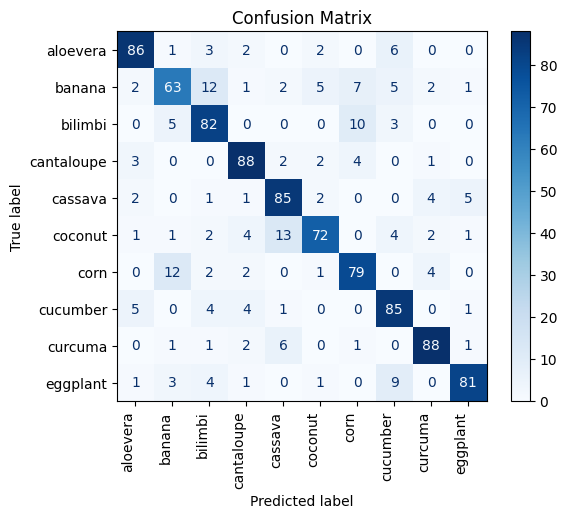

In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dự đoán trên tập validation
y_pred = model_cnn.predict(x_validation)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_validation, axis=1)

# Tạo confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Các nhãn lớp
class_dirs = ['aloevera','banana','bilimbi','cantaloupe','cassava','coconut','corn','cucumber','curcuma','eggplant']

# Hiển thị confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_dirs)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for better readability
plt.title('Confusion Matrix')
plt.show()


In [35]:
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6342 - loss: 2.4629
Test Loss: 2.0435261726379395
Test Accuracy: 0.6993497014045715


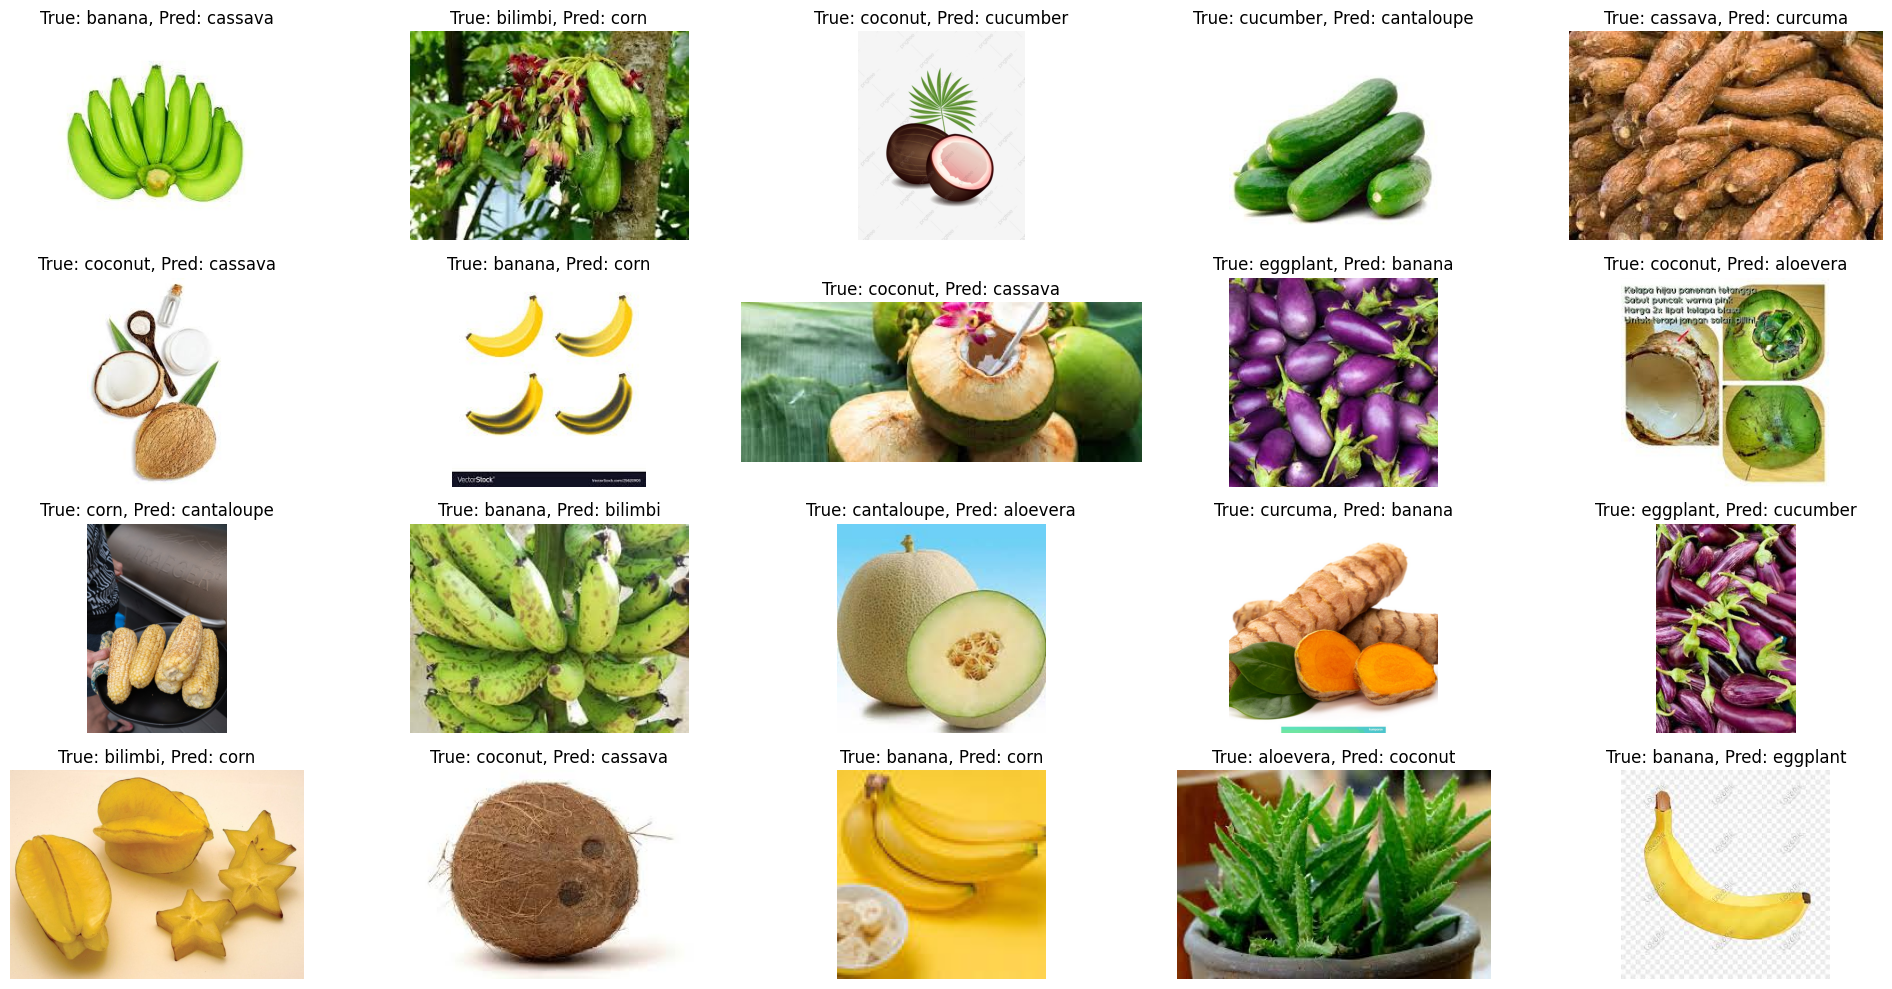

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Lọc các chỉ số của những bức hình đoán sai
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Chọn ngẫu nhiên 20 chỉ số từ những bức hình đoán sai
np.random.seed(1)
random_incorrect_indices = np.random.choice(incorrect_indices, 20, replace=False)

# Tên các thư mục chứa các lớp ảnh
class_dirs = ['aloevera', 'banana', 'bilimbi', 'cantaloupe', 'cassava', 'coconut', 'corn', 'cucumber', 'curcuma', 'eggplant']

# Hiển thị 20 bức hình đoán sai
plt.figure(figsize=(20, 10))
for i, idx in enumerate(random_incorrect_indices):
    # Tạo đường dẫn ảnh
    index = idx % 200 + 800
    if idx >= 1397:
        index += 1
        if index == 1000:
            index = 800
    image_path = f"dataset/test/{class_dirs[y_true[idx]]}/{class_dirs[y_true[idx]]}{index}.jpg"
    
    try:
        # Mở và hiển thị ảnh từ đường dẫn
        img = Image.open(image_path)
        plt.subplot(4, 5, i+1)
        plt.imshow(img)
        plt.title(f"True: {class_dirs[y_true[idx]]}, Pred: {class_dirs[y_pred_classes[idx]]}")
        plt.axis('off')
    except FileNotFoundError:
        print(f"Image not found at path: {image_path}")
        plt.subplot(4, 5, i+1)
        plt.axis('off')

plt.tight_layout()
plt.show()
